# Подготовка датасета 

In [25]:
import pandas as pd
import numpy as np
df = pd.read_csv('PPM_1.csv')
#выберем только тех, кто совершид покупку
df= df.loc[df['has_purchased_sum'] > 0]
#Сразу заменим пропуски на None:
df = df.where(pd.notnull(df), None)
df.head()

,created_at,sale,amo_FIRST_SINC,amo_UTM_SOURCE,amo_UTM_MEDIUM,amo_FORMID,amo_category,amo_bounce_reasons,has_purchased_sum,responsible_user_name,rassrochka,tripwire,trial,segment,paydate_fact,lead_name_group
9,2021-07-26T14:49:09,117607,None,None,None,None,Начинающий маркетолог,None,117607,Каролина Кондукович,нет,None,Нет,Горячий,2021-07-26T00:00:00,Jivo
11,2021-07-20T21:46:59,1,None,webroom,base,form321629363,Начинающий маркетолог,None,1,Каролина Кондукович,нет,None,Нет,Теплый,2021-07-21T00:00:00,Розыгрыш
17,2021-07-22T23:40:33,25481,2021-07-23T12:55:27,instagram,podpis,form336227684,Опытный маркетолог,None,25481,Каролина Кондукович,нет,None,Нет,Горячий,2021-07-26T00:00:00,Программа
21,2021-07-30T00:47:08,102707,2021-07-30T12:04:21,yandex,cpc,form336227684,Предприниматель,None,102707,Каролина Кондукович,да,None,Нет,Горячий,2021-07-30T00:00:00,Программа
34,2021-07-23T08:32:45,102607,2021-07-23T13:08:54,yandex,cpc,form280094388,Начинающий маркетолог,None,102607,Каролина Кондукович,нет,None,Нет,Горячий,2021-07-23T00:00:00,Рассрочка


,sale
sale,1.0


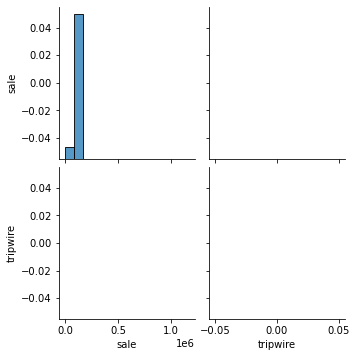

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
sns.pairplot(df, kind = 'reg')


In [23]:
df.corr()

,sale
sale,1.0


### Анализ номинативных переменных 

In [36]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='has_purchased_sum', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:20])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

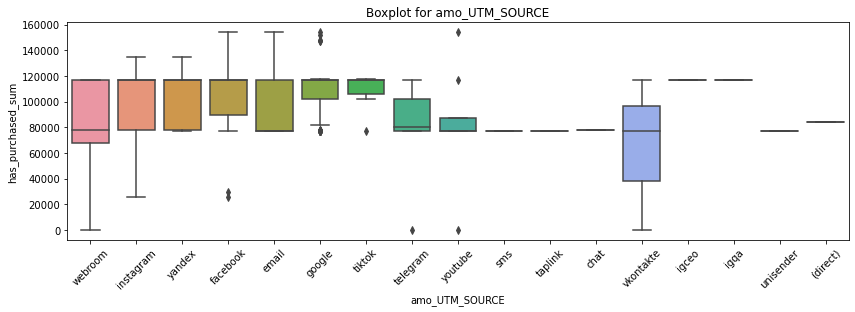

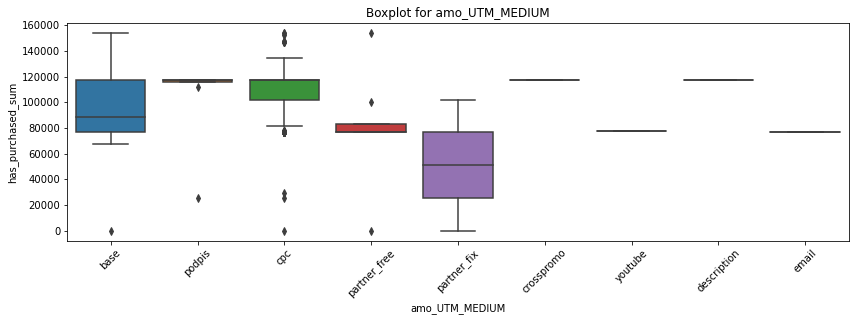

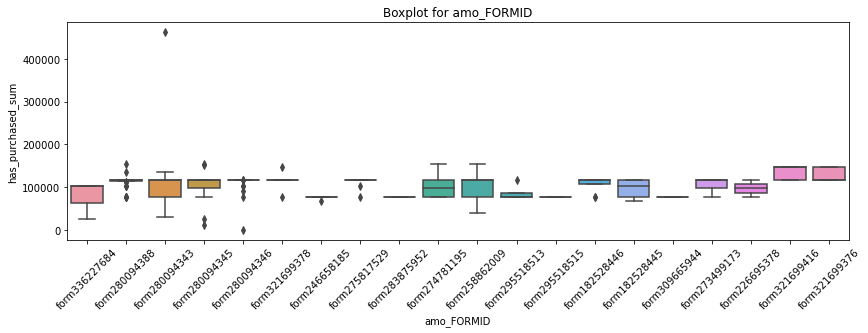

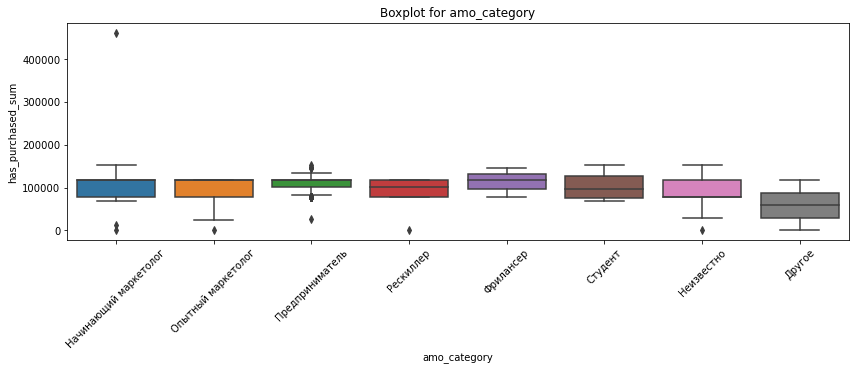

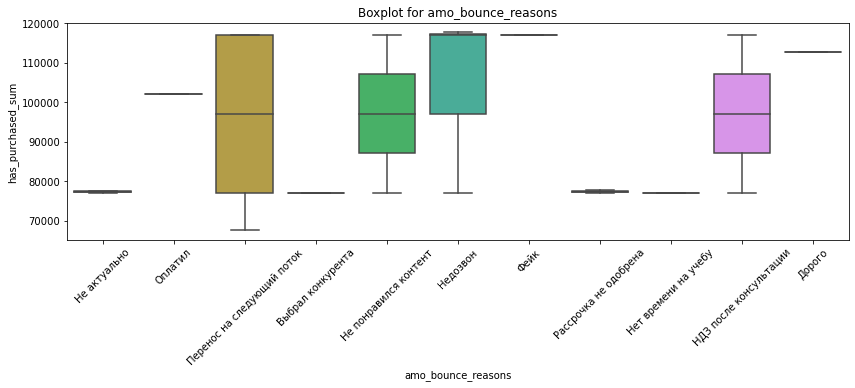

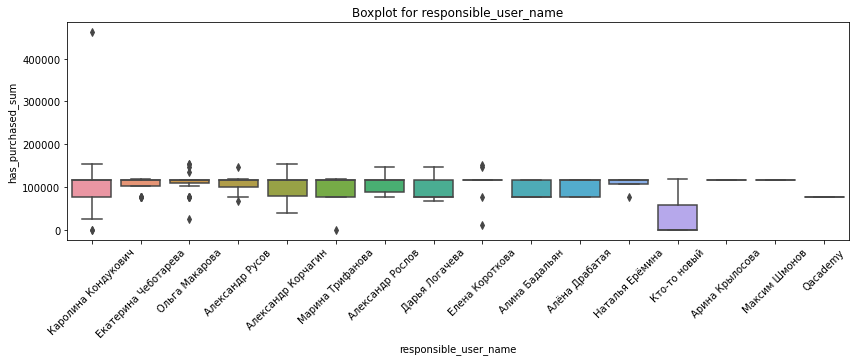

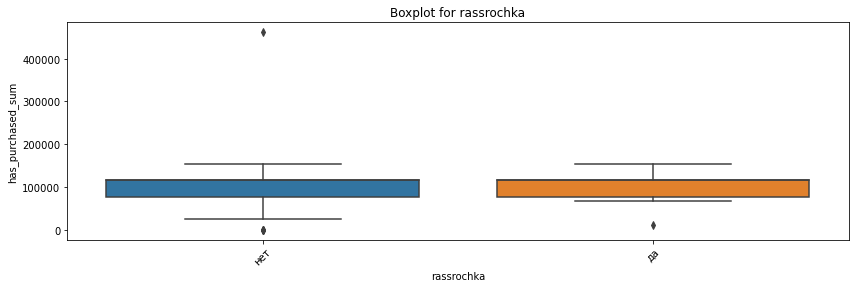

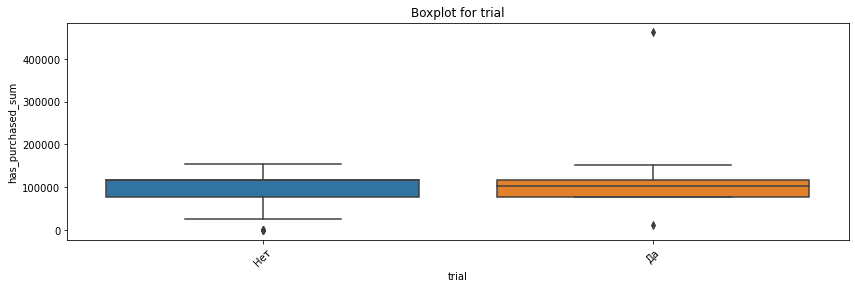

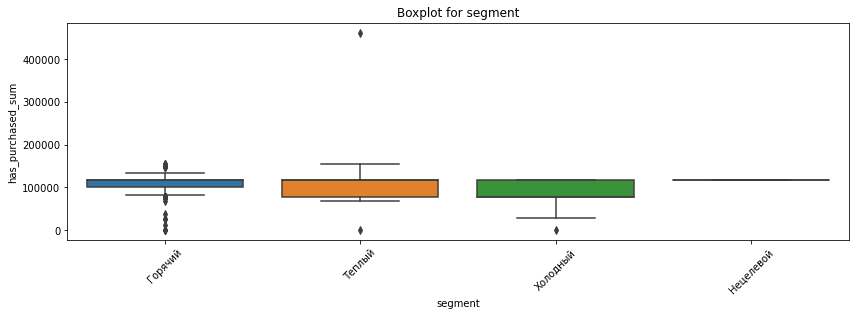

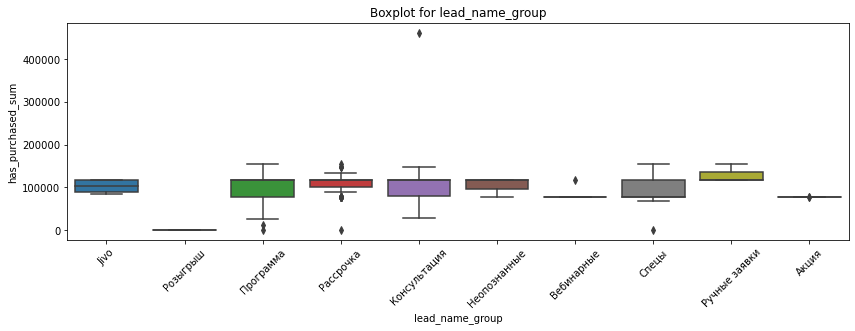

In [38]:
for col in ['amo_UTM_SOURCE', 'amo_UTM_MEDIUM', 'amo_FORMID', 'amo_category', 'amo_bounce_reasons', 'responsible_user_name', 'rassrochka', 'trial', 'segment', 'lead_name_group']:
    get_boxplot(col)

In [32]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'has_purchased_sum'], 
                        df.loc[df.loc[:, column] == comb[1], 'has_purchased_sum']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [33]:
for col in ['amo_UTM_SOURCE', 'amo_UTM_MEDIUM', 'amo_FORMID', 'amo_category', 'amo_bounce_reasons', 'responsible_user_name', 'rassrochka', 'tripwire', 'trial', 'segment', 'lead_name_group']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки amo_UTM_SOURCE
Найдены статистически значимые различия для колонки amo_UTM_MEDIUM
Найдены статистически значимые различия для колонки amo_FORMID
Найдены статистически значимые различия для колонки amo_category
Найдены статистически значимые различия для колонки segment
Найдены статистически значимые различия для колонки lead_name_group


C:\Users\olgas\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\olgas\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
